In [34]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

!pip install koreanize-matplotlib
import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

#  연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!

In [3]:
# 딕셔너리
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [13]:
# 매핑
df["연령대"] = df["연령대코드(5세단위)"].map(age_code)

In [15]:
# 기술통계값 출력
df.groupby("연령대")["허리둘레"].describe()

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


# "음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.

In [32]:
# 데이터 지정
df = df[["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]]

In [19]:
# 상관관계
corr = df.corr()
corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<Axes: >

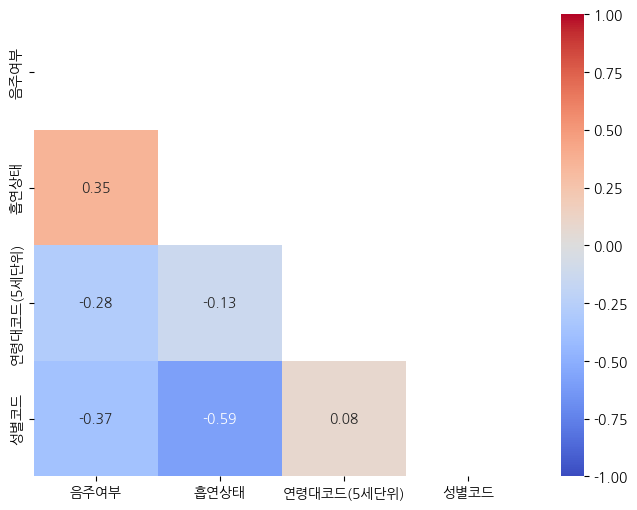

In [27]:
import matplotlib.pyplot as plt

# 시각화 (mask로 아래 값만 표시)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", vmin=-1, vmax=1)

# 흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?

흡연       끊음    흡연안함     흡연중
음주                         
마심   120779  213743  162166
안마심   55334  394503   52845


<Axes: xlabel='흡연', ylabel='count'>

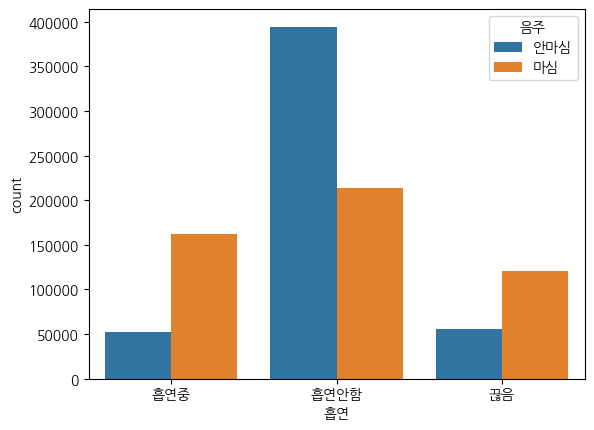

In [49]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 교체
df["흡연"] = df["흡연상태"].replace(smoke)
df["음주"] = df["음주여부"].replace(drink)

# 교차표 생성
cross_tab = pd.crosstab(df["음주"], df["흡연"])

print(cross_tab)

# 시각화
sns.countplot(x="흡연", data=df, hue="음주")

# 체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!

<Figure size 1500x500 with 0 Axes>

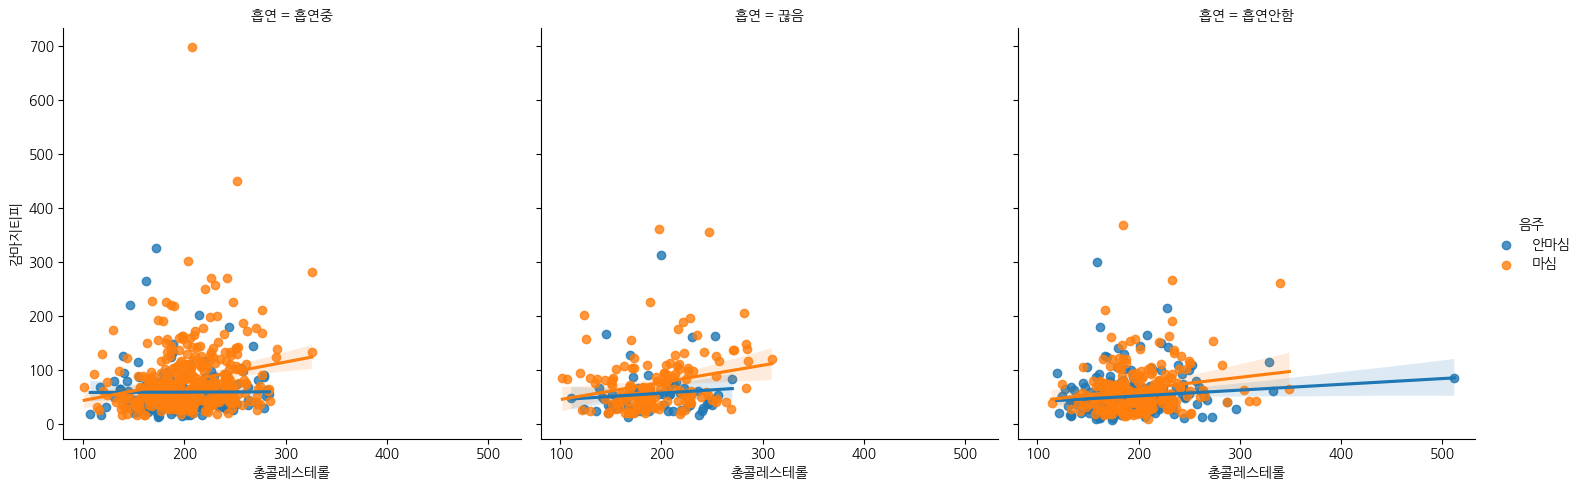

In [53]:
# 120kg 이상인 데이터만 저장
df_120kg = df[df["체중(5Kg 단위)"] >= 120]

# 시각화
plt.figure(figsize=(15, 5))
sns.lmplot(data=df_120kg, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

# 연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!

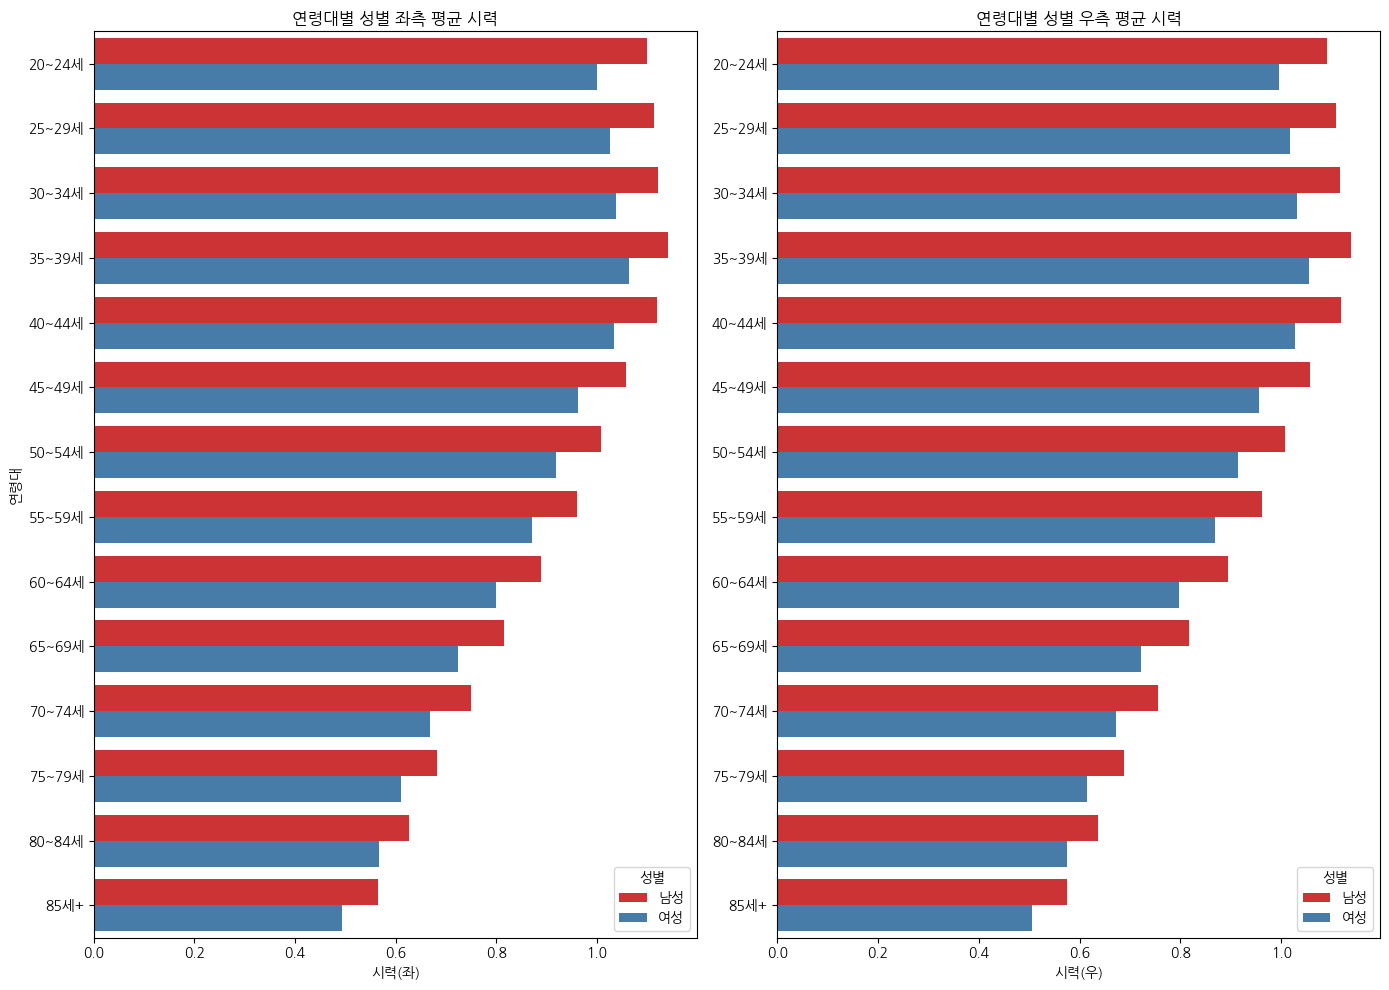

In [59]:
# 딕셔너리
age_code = {5: '20~24세', 6: '25~29세', 7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세',
            11: '50~54세', 12: '55~59세', 13: '60~64세', 14: '65~69세',
            15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+'}

# 교체
gender_map = {1: "남성", 2: "여성"}
df["성별코드"] = df["성별코드"].replace(gender_map)

df["연령대"] = df["연령대코드(5세단위)"].replace(age_code)

# 데이터 필터링
df_filtered = df[(df['시력(좌)'] > 0.1) & (df['시력(좌)'] < 9.9) & 
                 (df['시력(우)'] > 0.1) & (df['시력(우)'] < 9.9)]

# 평균 시력
mean_sight = df_filtered.groupby(['연령대', '성별코드']).agg({'시력(좌)': 'mean', '시력(우)': 'mean'}).reset_index()

# 데이터 정렬
mean_sight['연령대'] = pd.Categorical(mean_sight['연령대'],
                                              categories=sorted(age_code.values(), reverse=False))
# 시각화
plt.figure(figsize=(14, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=mean_sight, x='시력(좌)', y='연령대', hue='성별코드', palette='Set1')
plt.xlabel('시력(좌)')
plt.ylabel('연령대')
plt.title('연령대별 성별 좌측 평균 시력')
plt.legend(title='성별')

plt.subplot(1, 2, 2)
sns.barplot(data=mean_sight, x='시력(우)', y='연령대', hue='성별코드', palette='Set1')
plt.xlabel('시력(우)')
plt.ylabel('')
plt.title('연령대별 성별 우측 평균 시력')
plt.legend(title='성별')

plt.tight_layout()
plt.show()